# Explore here

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, DecisionTreeRegressor
from sklearn.metrics import *
from imblearn.metrics import specificity_score

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
pd.set_option('display.max_columns', None)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Se quiere predecir si el paciente es diabético (1) o no (0).

# EDA


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Comprobación de duplicados
df.duplicated().sum()

np.int64(0)

No hay valores nulos ni duplicados.

Parece que los datos están limpios, paso a normalizarlos y hacer la división.

In [6]:
data_sc = pd.DataFrame(data=StandardScaler().fit_transform(df.drop(['Outcome'], axis=1)), columns=df.columns[:-1])
data_sc['Outcome'] = df.Outcome

In [7]:
data_sc

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


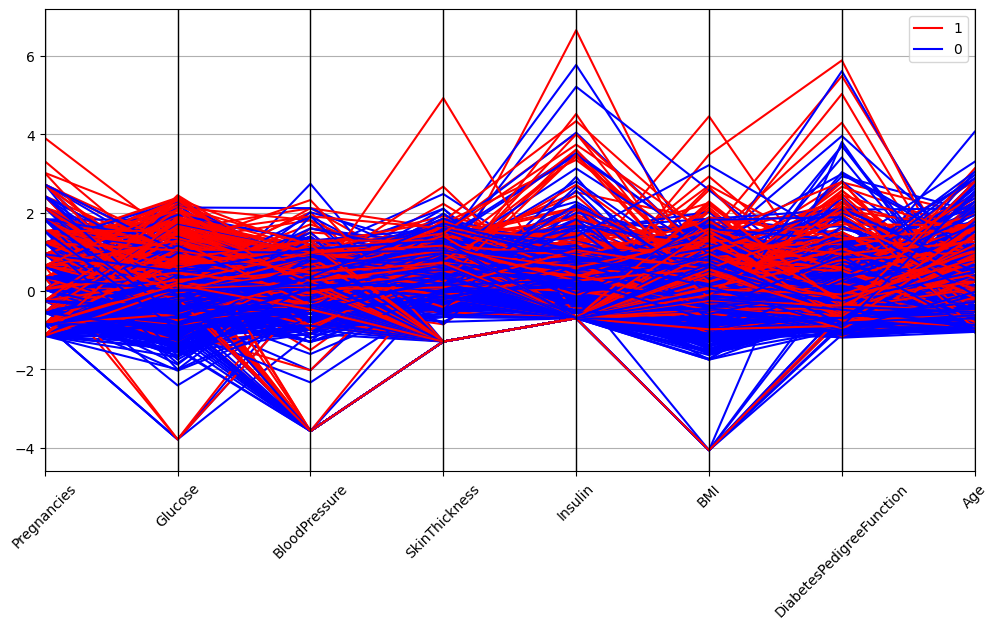

In [8]:
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data_sc, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

División


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df.Outcome, test_size=0.2, random_state=42)

## Nota importante:
#### En este caso no se usan los datos escalados porque el algoritmo de arbol de decisión no es sensible a la escala de las variables-.

###  Creamos un árbol complejo y otro simple para comparar y notar el overfitting

In [10]:
complex_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=1, random_state=42).fit(X_train, y_train)
simple_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, max_features=X_train.shape[1]//2, random_state=42).fit(X_train, y_train)

y_pred_train_complex = complex_tree.predict(X_train)
y_pred_test_complex = complex_tree.predict(X_test)

y_pred_train_simple = simple_tree.predict(X_train)
y_pred_test_simple = simple_tree.predict(X_test)

In [11]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [16]:
get_metrics(y_train, y_test, y_pred_train_complex, y_pred_test_complex)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.000,1.000000,1.000000
Test,0.746753,0.672269,0.742424,0.625,0.727273,0.757576
Diferencia,0.253247,0.327731,0.257576,0.375,0.272727,0.242424


In [17]:
get_metrics(y_train, y_test, y_pred_train_simple, y_pred_test_simple)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.737785,0.663883,0.739823,0.597744,0.746479,0.733167
Test,0.636364,0.594203,0.660606,0.493976,0.745455,0.575758
Diferencia,0.101421,0.069680,0.079217,0.103768,0.001024,0.157410


hay overfitting con el modelo complejo pero la precición con los datos de testeo es mucho mejor. La precisión es muy baja en el modelo simple, sin embargo, el Recall (0,74) es aceptable ya que es el número de veces que ha predicho bien diabéticos del total de diabéticos.

En resumen el modelo es bueno para predecir diabéticos pero no para predecir no diabéticos, es decir, sobrediagnostíca diabetes.

Matriz de confusión para entender los parámetros de la metrica

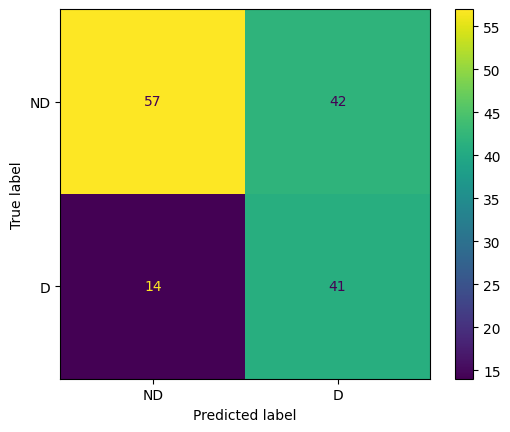

In [23]:
cm = confusion_matrix(y_test, y_pred_test_simple)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ND', 'D'])
disp.plot()

Hay muchos no diabéticos que predice como diabéticos.

Árbol escrito

In [18]:
text_representation = export_text(simple_tree, feature_names=list(X_train.columns))
print(text_representation)

|--- Age <= 28.50
|   |--- Glucose <= 127.50
|   |   |--- BMI <= 30.95
|   |   |   |--- class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- class: 0
|   |--- Glucose >  127.50
|   |   |--- SkinThickness <= 31.50
|   |   |   |--- class: 0
|   |   |--- SkinThickness >  31.50
|   |   |   |--- class: 1
|--- Age >  28.50
|   |--- BMI <= 27.85
|   |   |--- Glucose <= 123.00
|   |   |   |--- class: 0
|   |   |--- Glucose >  123.00
|   |   |   |--- class: 0
|   |--- BMI >  27.85
|   |   |--- Insulin <= 142.00
|   |   |   |--- class: 1
|   |   |--- Insulin >  142.00
|   |   |   |--- class: 1



Árbol

[Text(0.5, 0.875, 'Age <= 28.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = D'),
 Text(0.25, 0.625, 'Glucose <= 127.5\ngini = 0.304\nsamples = 300\nvalue = [244, 56]\nclass = D'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'BMI <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]\nclass = D'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]\nclass = D'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]\nclass = D'),
 Text(0.375, 0.375, 'SkinThickness <= 31.5\ngini = 0.5\nsamples = 79\nvalue = [40, 39]\nclass = D'),
 Text(0.3125, 0.125, 'gini = 0.471\nsamples = 50\nvalue = [31, 19]\nclass = D'),
 Text(0.4375, 0.125, 'gini = 0.428\nsamples = 29\nvalue = [9, 20]\nclass = ND'),
 Text(0.75, 0.625, 'BMI <= 27.85\ngini = 0.5\nsamples = 314\nvalue = [157, 157]\nclass = D'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Glucose <= 123.0\ngini = 0.358\nsamples = 77\nvalue = [59, 18]\nclass = D'),
 Text(0.5625, 0.125, 'gini = 0.1

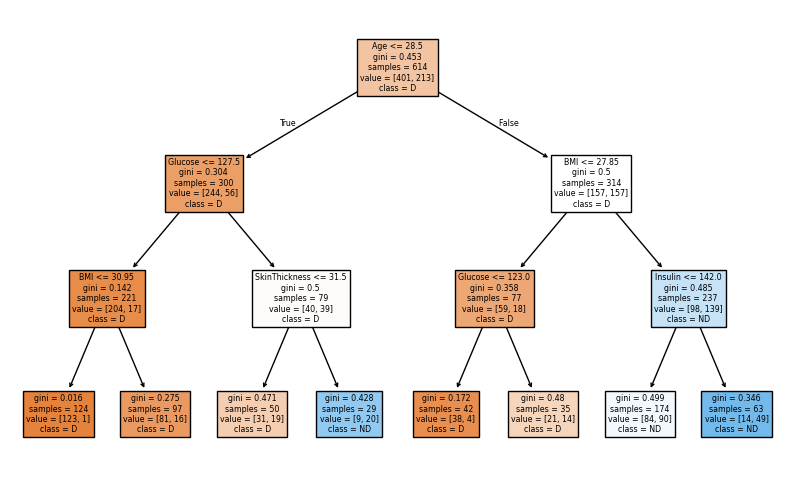

In [21]:
plt.figure(figsize=(10,6))
plot_tree(simple_tree, feature_names=list(X_train.columns), class_names=['ND', 'D'], filled=True)

[Text(0.4602238581730769, 0.9642857142857143, 'Glucose <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = D'),
 Text(0.1650390625, 0.8928571428571429, 'Age <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]\nclass = D'),
 Text(0.31263146033653844, 0.9285714285714286, 'True  '),
 Text(0.06009615384615385, 0.8214285714285714, 'BMI <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]\nclass = D'),
 Text(0.019230769230769232, 0.75, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.016\nsamples = 124\nvalue = [123, 1]\nclass = D'),
 Text(0.009615384615384616, 0.6785714285714286, 'gini = 0.0\nsamples = 108\nvalue = [108, 0]\nclass = D'),
 Text(0.028846153846153848, 0.6785714285714286, 'DiabetesPedigreeFunction <= 0.686\ngini = 0.117\nsamples = 16\nvalue = [15, 1]\nclass = D'),
 Text(0.019230769230769232, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = ND'),
 Text(0.038461538461538464, 0.6071428571428571, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]\ncl

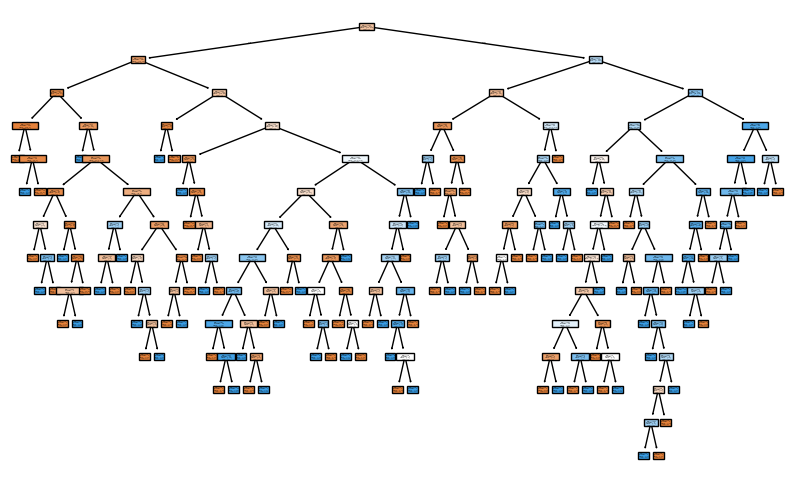

In [22]:
plt.figure(figsize=(10,6))
plot_tree(complex_tree, feature_names=list(X_train.columns), class_names=['ND', 'D'], filled=True)

La eficacia obtenida en la solución es con modelo complejo.